# <div style="text-align: center"> Using Python ADVANCED

## <div style="text-align: center">Introduction to Python (IV) - Advanced topics

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [74]:
# to navigate through folders and files
import os.path as op
import glob


# this module calculates time differences
from dateutil.relativedelta import relativedelta

# for operations on dates
import datetime


# for loading and normalizing json files
import json
from pandas.io.json import json_normalize


# to display progress and execution time, e.g. for loops
from tqdm import tqdm_notebook as tqdm

We will often use these and other imports appearing in the notebook, and probably we will not always want to enter them all. Sometimes it's good to take a moment and keyboard in all these imports, but for the sake of our time and mental comfort we can create a `.py` file with all frequently used imports and continue to use it in our notebook. That's why the warm-up exercise is waiting for you:

### Exercise - Importing functions from external files
* Create the file `imports.txt` in the folder with this notebook. In addition, you can use, for example, the text editor [Atom](https://atom.io/).
* copy to the file `imports.txt` imports appearing in the first two cells of this notebook (but not`%matplotlib inline` - it is a "magical function" and works only in notebooks) and save `imports.py`
* replace the contents of the first cell of this notebook (the one with imports) with:
  ```Python
  from imports import *
  ```
  it means *import everything from a file / module called `imports`*
* restart your notebook (`kernel -> restart`), start from the beginning and check if the following cell is working:

---

# Databases - advanced level
File operations, dates, data wrangling

### Below we load 4 .json files downloaded from Wikidata:
https://www.wikidata.org/wiki/Wikidata:Main_Page <br>
https://query.wikidata.org/ <br>

These files contain various data about musicians from specific styles of music. However, all databases have the same number of columns (though different number of rows). They are taken from json files, so this is semi-structured data.

Let's define a path to load files so that you do not have to enter it constantly over and over again:

In [22]:
op.join(PTH, '*.json')

'C:\\Users\\bartf\\Downloads\\DATA\\*.json'

In [21]:
PTH = r'C:\Users\bartf\Downloads\DATA'

# the below code is creating a list of all file addresses - json files
FILES_JSON = glob.glob(op.join(PTH, '*.json')) 

In [78]:
FILES_JSON

['C:\\Users\\bartf\\Downloads\\DATA\\death_death_metal.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_hip_hop_music.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_jazz.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_pop_music.json']

We can load the first file to review it

In [24]:
with open(FILES_JSON[0], encoding='utf-8', errors='ignore') as json_data:
         data = json.load(json_data, strict=False)

# create a new dataframe, and normalize it
df_json = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

<ipython-input-24-417a9f3bf025>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_json = pd.DataFrame.from_dict(json_normalize(data), orient='columns')


In [32]:
# data list consists of dictionaries - not convenient for our operations
data

[{'instance_of': 'http://www.wikidata.org/entity/Q25660',
  'instance_ofLabel': 'Tomasz Wróblewski',
  'date_of_birth': '1980-06-02T00:00:00Z',
  'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
  'country_of_citizenshipLabel': 'Poland',
  'instrument': 'http://www.wikidata.org/entity/Q6607',
  'instrumentLabel': 'guitar',
  'occupation': 'http://www.wikidata.org/entity/Q177220',
  'occupationLabel': 'singer',
  'sex_or_gender': 'http://www.wikidata.org/entity/Q6581097',
  'sex_or_genderLabel': 'male',
  'place_of_birth': 'http://www.wikidata.org/entity/Q270',
  'place_of_birthLabel': 'Warsaw'},
 {'instance_of': 'http://www.wikidata.org/entity/Q25660',
  'instance_ofLabel': 'Tomasz Wróblewski',
  'date_of_birth': '1980-06-02T00:00:00Z',
  'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
  'country_of_citizenshipLabel': 'Poland',
  'instrument': 'http://www.wikidata.org/entity/Q46185',
  'instrumentLabel': 'bass guitar',
  'occupation': 'http://www.wikidata

What does the base look like? Please display the first 5 lines.

In [73]:
df_json.head()

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Please check the dimensions of the base, and then check how many 'unique' musicians are in the base.

</div>

In [41]:
df_json.shape


(371, 20)

In [40]:
df_json.instance_ofLabel.nunique()

100

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Please check what data types we have in each column.

</div>

In [49]:
#df_json.info
df_json.dtypes

instance_of                    object
instance_ofLabel               object
date_of_birth                  object
country_of_citizenship         object
country_of_citizenshipLabel    object
instrument                     object
instrumentLabel                object
occupation                     object
occupationLabel                object
sex_or_gender                  object
sex_or_genderLabel             object
place_of_birth                 object
place_of_birthLabel            object
date_of_death                  object
cause_of_death                 object
cause_of_deathLabel            object
manner_of_death                object
manner_of_deathLabel           object
place_of_death                 object
place_of_deathLabel            object
dtype: object

We define two variables, where one will contain only columns with dates, and the other all others.

In [50]:
col_dates = ['date_of_birth', 'date_of_death']

col_no_dates = ['cause_of_deathLabel', 'manner_of_deathLabel',
                'country_of_citizenshipLabel', 'place_of_birthLabel',
                'place_of_deathLabel', 'sex_or_genderLabel']

Please think about how to merge the entire database, but in such a way that one row would be one person (it's a very difficult task!).

#### This can be done e.g. in the following way:

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Please create an empty DataFrame called `df` that would have as columns 'instance_ofLabel'+col_dates+col_no_dates, and the length of the df (i.e. the number of rows) would be equal to the number of unique musicians in the base.

</div>

In [65]:
musician_columns = ['musician_name']+ col_dates + col_no_dates

In [69]:
musician_columns = ['musician_name'] + col_dates + col_no_dates



musician_index = range(df_json.instance_ofLabel.nunique())



print(musician_columns)



print(musician_index)



df = pd.DataFrame(columns=musician_columns, index=musician_index)

['musician_name', 'date_of_birth', 'date_of_death', 'cause_of_deathLabel', 'manner_of_deathLabel', 'country_of_citizenshipLabel', 'place_of_birthLabel', 'place_of_deathLabel', 'sex_or_genderLabel']
range(0, 100)


In [64]:
df = pd.DataFrame(columns=musician_columns, index=musician_index)
df.head

<bound method NDFrame.head of    musician_name date_of_birth date_of_death cause_of_deathLabel  \
0            NaN           NaN           NaN                 NaN   
1            NaN           NaN           NaN                 NaN   
2            NaN           NaN           NaN                 NaN   
3            NaN           NaN           NaN                 NaN   
4            NaN           NaN           NaN                 NaN   
..           ...           ...           ...                 ...   
95           NaN           NaN           NaN                 NaN   
96           NaN           NaN           NaN                 NaN   
97           NaN           NaN           NaN                 NaN   
98           NaN           NaN           NaN                 NaN   
99           NaN           NaN           NaN                 NaN   

   manner_of_deathLabel country_of_citizenshipLabel place_of_birthLabel  \
0                   NaN                         NaN                 NaN   
1  

So above attribute means that we will have 100 unique musicians in the death metal music genre.

### Now, please fill in the first column `musician_name` with unique names of musicians.

**IMPORTANT**: We need unique musicians in each row, because in statistics/visualisations etc. each separate row should correspond to a separate person/object/event. Otherwise, you would visualise e.g. 18 Tomasz Wróblewskis from our database and 5 Alex Websters, instead of 1 instance of each musician! This would create a bias in your statistics/visualisations.

In [93]:
df.musician_name = df_json.instance_ofLabel.unique()

In [84]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,<bound method Series.unique of 0 Tomasz W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,<bound method Series.unique of 0 Tomasz W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<bound method Series.unique of 0 Tomasz W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,<bound method Series.unique of 0 Tomasz W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,<bound method Series.unique of 0 Tomasz W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Sort the base by musician names.

</div>

In [96]:
df = df.sort_values(by='musician_name').reset_index(drop=True)
df

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allen West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anders Hammer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Astennu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,Trevor Peres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Tuomas Lintulaakso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Varg Vikernes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Wagner Lamounier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 5 (VERY DIFFICULT)
<br>

Please fill in the dataframe `df` with data from `df_json`. This is difficult, since the dataframes have different dimensions. So you need to devise a way of filling smaller `df` with squeezed info from `df_json`.
<br><br>
HINT: you need to use a loop and go through `col_dates` and `col_no_dates`, and in each iteration assign certain values to `df` using `df.loc[:, column]`. 

</div>

In [50]:
df.shape

(100, 9)

In [51]:
df_json.shape

(371, 20)

In [56]:
df_json.columns

Index(['cause_of_death', 'cause_of_deathLabel', 'country_of_citizenship',
       'country_of_citizenshipLabel', 'date_of_birth', 'date_of_death',
       'instance_of', 'instance_ofLabel', 'instrument', 'instrumentLabel',
       'manner_of_death', 'manner_of_deathLabel', 'occupation',
       'occupationLabel', 'place_of_birth', 'place_of_birthLabel',
       'place_of_death', 'place_of_deathLabel', 'sex_or_gender',
       'sex_or_genderLabel'],
      dtype='object')

In [78]:
df.head(2)

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,1969-10-25T00:00:00Z,NaN,NaN,NaN,United States of America,Akron,NaN,male
1,Allen West,1967-10-17T00:00:00Z,NaN,NaN,NaN,United States of America,Brandon,NaN,male


<div class="alert alert-block alert-warning">
📺 WATCH AT HOME
<br>

In the above code we have used the very important functions `enumerate` and `query`:

[Enumerate - Intermediate Python Programming](https://www.youtube.com/watch?v=bOGmYvtw-kk)
<br>
[Python Pandas | Querying Dataframe](https://www.youtube.com/watch?v=6WTFF-mKZX8)

</div>

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Please replace the objects in the columns with dates with the date format using the function `pd.to_datetime()`.
HINT: this function should take the parameter `format = '%Y-%m-%dT%H:%M:%SZ'` - this is exactly the format of our dates in this file.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Add a group name (the music genre name) to the dataframe as the last column.<br>
HINT: you can use the json file name to do it.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 8 (DIFFICULT)
<br>

Please create a loop now, that would load each file from `FILES_JSON`, and then do the above operations on each of them in the loop. Then, add each file to a grand dataframe (merging all files together in one big dataframe)!

</div>

In [ ]:
DF_final = pd.DataFrame()

for file in tqdm(FILES_JSON):
    # for Windows
    genre_name = file.split('\\')[-1].split('.')[0][6:]
#     # for Mac/Linux
#     genre_name = file.split('/')[-1].split('.')[0][6:]
#     print(file)
#     print(genre_name)
#     print('\n')
    
    # loading the data from JSON - df_json
    
    
    
    # create an empty dataframe df
    
    
    
    # fill out the df dataframe with values from the df_json dataframe
    
    
    
    # convert datetime columns to datetime format
    
    
    # add a 'genre' column
    
    
    # append the DF_final with df dataframe
    

# Below, we are importing the final code written by me, for setting up the databases and merging them into one dataframe

In [85]:
from create_dataframe_music import create_music_df

In [86]:
DB_final = create_music_df(file_name=FILES_JSON)

There are 4 genres of music to process...




******************* Starting the file: death_metal...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: hip_hop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: jazz...
--------======WARNING======-------- There are persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: pop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...





In [87]:
DB_final.head()

,instance_ofLabel,instance_of,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel,quantity_instrumentLabel,quantity_occupationLabel,years_of_life,Group
0,Alex Webster,NaN,1969-10-25,NaT,NaN,NaN,United States of America,Akron,NaN,male,2.0,2,NaN,death_metal
1,Allen West,NaN,1967-10-17,NaT,NaN,NaN,United States of America,Brandon,NaN,male,1.0,1,NaN,death_metal
2,Anders Hammer,NaN,1980-04-03,NaT,NaN,NaN,Sweden,NaN,NaN,male,1.0,1,NaN,death_metal
3,Ares,NaN,1973-06-03,NaT,NaN,NaN,Norway,Bergen,NaN,male,2.0,3,NaN,death_metal
4,Astennu,NaN,2000-01-01,NaT,NaN,NaN,Australia,Sydney,NaN,male,1.0,3,NaN,death_metal


In [88]:
DB_final.shape

(3389, 14)

---

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Please check the minimum year of birth in each of the 4 music groups.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

Please visualize the years of life and see if everything is good.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Please select from the database only those who were born in the earliest year of birth in the death metal group (i.e. when the first death metal musician was born). Assign the result dataframe to the variable `df_death`. Please also remove people who have a negative life duration.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 12
<br>

Please check the number of deceased people in each group.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Please plot the life duration of people from particular groups, using both `sns.stripplot` (each dot will show the life duration of one person) and `sns.pointplot` (shows the average for a given group).
<br><br>
Stripplot should have the additional arguments `dodge=True, jitter=True`, while pointplot should have the argument `dodge=.532`.

</div>

Text(0.5, 1.0, 'Longevity for musicians from different music genres')

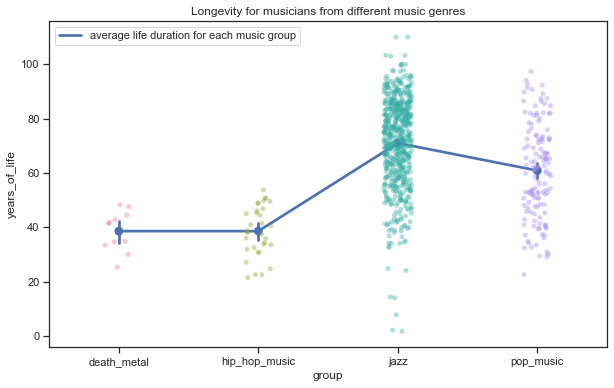